# 전처리

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Users/tmdwh/AppData/Local/Microsoft/Windows/Fonts/ACC어린이마음고운체.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 파일 읽어드리기

In [2]:
lib_in = pd.read_csv("데이터_단행본대출.csv", encoding = 'cp949') 
#-> 0번째 행을 index로 사용하겠다 열을 가지고 싶으면 index_row=0)
# encoding ->  'cp949' :한글 파일도 가져옴
print(lib_in.info())
print('-----------------------------------------------------------------------------------------')
lib_in = lib_in.dropna(how='any') #-> 하나라도 있으면 지움
print(lib_in.info())

#Errow -> column에 NaN 이 있거나 여러타입이 섞여 있으면 다음과 같이 나온다
#해결 방법 csv 읽을때  low_memory=False 추가
#C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165:
#DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
#  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581952 entries, 0 to 581951
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대출일시    581952 non-null  object
 1   반납일시    581670 non-null  object
 2   등록번호    581952 non-null  object
 3   ISBN    577339 non-null  object
 4   서명      581952 non-null  object
 5   대출연장구분  581952 non-null  object
 6   연대출권수   581952 non-null  int64 
 7   입학년도    581952 non-null  int64 
 8   소속      581952 non-null  object
 9   상위소속    581555 non-null  object
dtypes: int64(2), object(8)
memory usage: 44.4+ MB
None
-----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 576698 entries, 30 to 581951
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대출일시    576698 non-null  object
 1   반납일시    576698 non-null  object
 2   등록번호    576698 non-null  object
 3

In [3]:
#year_borrow와 admission_year int 형이였음 좋겠음
lib_in['연대출권수'] = lib_in['연대출권수'].astype(int)
lib_in['입학년도'] = lib_in['입학년도'].astype(int)

#필요없는 열 지우기
lib_in= lib_in.drop([lib_in.columns[0],lib_in.columns[1],lib_in.columns[2],lib_in.columns[5],lib_in.columns[9]], axis= 1)
lib_in

ISBN                                     서명  연대출권수  입학년도  \
30      9788969940001  해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세    130  2012   
31      9788937473005          주말, 출근, 산책 : 어두움과 비 :김엄지 장편소설    130  2012   
32      9788996937432                         자본주의 사회주의 민주주의     90  2014   
33      9788960863101                   메시 :혼돈에서 탄생화는 극적인 결과     90  2014   
34      9788970551234                                소유냐 삶이냐     90  2014   
...               ...                                    ...    ...   ...   
581947  9791159055867            이질적인 선율들이 넘치는 세계 :다문화시대의 문학     18  2018   
581948  9788936477196                              선량한 차별주의자      6  2021   
581949  9788962620696                        카오스 :새로운 과학의 출현     56  2021   
581950  9791187142584                                  유한계급론     56  2021   
581951  9791187142454                     프로테스탄트 윤리와 자본주의 정신     56  2021   

              소속  
30           철학과  
31           철학과  
32        금융경제학과  
33        금융경제학과  
34        금융경제학과  
...          ...  
581947    국어국문학과  
581948    국어국문학과  
581949  의생명시스템학부  
581950  의생명시스템학부  
581951  의생명시스템학부  

[576698 rows x 5 columns]

In [4]:
# 중복되는 데이터 지우기
# 가정 (year_borrow admission_year,department) -> primary_key
lib_in =lib_in.drop_duplicates(['연대출권수' ,'입학년도','소속'])
lib_in

ISBN                                                 서명  \
30      9788969940001              해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세   
32      9788996937432                                     자본주의 사회주의 민주주의   
35      9791125563006                                      블루밍 :박샛별 장편소설   
39      9791186289501                                   노동법 원포인트 판례 170선   
44      9788937460005                                                페스트   
...               ...                                                ...   
580347  9788932916248                       이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기   
581178  9791158741365  디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...   
581435  9788936471200                                시대의 증언자 쁘리모 레비를 찾아서   
581777  9788930040587   뉴미디어와 정보사회 =New media in the information society   
581939  9780486686097  Topology :an introduction to the point-set and...   

        연대출권수  입학년도        소속  
30        130  2012       철학과  
32         90  2014    금융경제학과  
35         29  2016     전기공학부  
39         49  2010  벤처중소기업학과  
44        198  2013  벤처중소기업학과  
...       ...   ...       ...  
580347      5  2008       철학과  
581178      9  2021      건축학부  
581435      3  2021    국어국문학과  
581777      7  2021    언론홍보학과  
581939     19  2018       수학과  

[14158 rows x 5 columns]

##### 정제된 데이터 14158개

In [5]:
#index 재할당
lib_in.index = np.arange(len(lib_in))
lib_in

ISBN                                                 서명  \
0      9788969940001              해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세   
1      9788996937432                                     자본주의 사회주의 민주주의   
2      9791125563006                                      블루밍 :박샛별 장편소설   
3      9791186289501                                   노동법 원포인트 판례 170선   
4      9788937460005                                                페스트   
...              ...                                                ...   
14153  9788932916248                       이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기   
14154  9791158741365  디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...   
14155  9788936471200                                시대의 증언자 쁘리모 레비를 찾아서   
14156  9788930040587   뉴미디어와 정보사회 =New media in the information society   
14157  9780486686097  Topology :an introduction to the point-set and...   

       연대출권수  입학년도        소속  
0        130  2012       철학과  
1         90  2014    금융경제학과  
2         29  2016     전기공학부  
3         49  2010  벤처중소기업학과  
4        198  2013  벤처중소기업학과  
...      ...   ...       ...  
14153      5  2008       철학과  
14154      9  2021      건축학부  
14155      3  2021    국어국문학과  
14156      7  2021    언론홍보학과  
14157     19  2018       수학과  

[14158 rows x 5 columns]

In [6]:
#학년별 연대출권수
admission_year_borrow = lib_in.groupby('입학년도')['연대출권수'].count()
print(admission_year_borrow.describe())
admission_year_borrow

count      36.000000
mean      393.277778
std       612.671136
min         1.000000
25%         3.000000
50%        13.000000
75%       580.500000
max      1744.000000
Name: 연대출권수, dtype: float64


입학년도
1973       2
1977       1
1979       1
1981       5
1983       3
1984       3
1989       3
1990       2
1991       2
1994       5
1995       3
1996       6
1998       2
1999      11
2000      14
2001       4
2002       6
2003      12
2004       8
2005      34
2006      26
2007      70
2008      98
2009     210
2010     416
2011     681
2012    1114
2013    1407
2014    1631
2015    1744
2016    1738
2017    1707
2018    1350
2019     958
2020     547
2021     334
Name: 연대출권수, dtype: int64

In [7]:
admission_year_borrow.index

Int64Index([1973, 1977, 1979, 1981, 1983, 1984, 1989, 1990, 1991, 1994, 1995,
            1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='입학년도')

In [8]:
admission_year_borrow.values

array([   2,    1,    1,    5,    3,    3,    3,    2,    2,    5,    3,
          6,    2,   11,   14,    4,    6,   12,    8,   34,   26,   70,
         98,  210,  416,  681, 1114, 1407, 1631, 1744, 1738, 1707, 1350,
        958,  547,  334], dtype=int64)

Text(0, 0.5, 'year_borrow')

findfont: Font family ['ACCchildrenheartTTF'] not found. Falling back to DejaVu Sans.


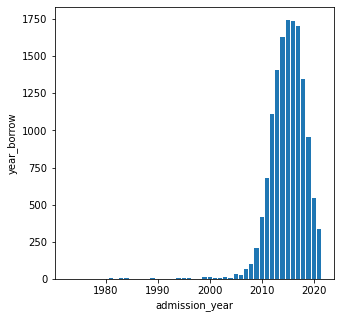

In [9]:
admission_year_list = admission_year_borrow.index.tolist()
#x = np.arange(len(admission_year_list)) #보기편하려고
x = admission_year_list
y = cnt_year_borrow = admission_year_borrow.values.tolist()


plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.bar(x,y, align = 'center')
plt.xlabel("admission_year")
plt.ylabel("year_borrow")


In [10]:
admission_year_ISBM = lib_in.groupby('입학년도')['ISBN']
#입학년도별 top
admission_year_ISBM.describe()

count unique              top freq
입학년도                                    
1973      2      1    9788989516231    2
1977    1.0    1.0  9788999400629.0  1.0
1979      1      1    9788959124220    1
1981      5      5    9788972753874    1
1983      3      3    9788931553192    1
1984      3      3    9791159310461    1
1989      3      3    9788947242448    1
1990      2      2    9788965749318    1
1991      2      2    9788964065532    1
1994      5      5    9791157842636    1
1995      3      3    9788962620887    1
1996      6      6    9788937450501    1
1998      2      2    9788993322873    1
1999     11     11    9780495809968    1
2000     14     14    9788990890504    1
2001      4      4    9788992935043    1
2002      6      6    9788982555152    1
2003     12     12    9788975989063    1
2004      8      8    9791186984314    1
2005     34     33    9781405821940    2
2006     26     25    9788984113282    2
2007   70.0   70.0  9788999710643.0  1.0
2008     98     96    9788957075425    2
2009    210    209    9788996395584    2
2010    416    400    9788937460005    3
2011    681    662    9788937460005    5
2012   1114   1032    9788937460005   11
2013   1407   1290    9788937460005    9
2014   1631   1476    9788937460005   21
2015   1744   1544    9788937460005   30
2016   1738   1546    9788937460005   17
2017   1707   1502    9788937460005   20
2018   1350   1177    9788937460005   15
2019    958    877    9788937460005    9
2020  547.0  516.0  9788937460005.0  5.0
2021    334    302    9788901229614    4

In [11]:
#전체 베스트 셀러
item_count = lib_in['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 미움받을 용기 45
Top 2 : 멋진 신세계 32
Top 3 : 채식주의자 :한강 연작소설 27
Top 4 : 데미안 25
Top 5 : 미분적분학 =Calculus 24
Top 6 : 이방인 24
Top 7 : 역사란 무엇인가 24
Top 8 : 나미야 잡화점의 기적 :히가시노 게이고 장편소설 23
Top 9 : 지적 대화를 위한 넓고 얕은 지식 :역사, 경제, 정치, 사회, 윤리 편 19
Top 10 : 1Q84 :무라카미 하루키 장편소설 19


In [12]:
admission_year_name = lib_in.groupby('입학년도')['서명']
admission_year_name.describe()

count unique                                                top freq
입학년도                                                                     
1973     2      1                그런 기독교는 없습니다:개혁주의 교리 강단:김성수목사 교리강해선    2
1977     1      1                                            사회복지실천론    1
1979     1      1                     사회복지정책론 =Social welfare policy    1
1981     5      5                                일곱 해의 마지막 :김연수 장편소설    1
1983     3      3                              Qt4를 이용한 C++ GUI프로그래밍    1
1984     3      3  그래서 우리는 계속 읽는다 :F. 스콧 피츠제럴드와 《위대한 개츠비》 그리고 고전을...    1
1989     3      3   (국가공인자격)KBS 한국어 능력시험.6,제17, 18, 19, 20회 기출문제ㅣ해설집    1
1990     2      2                   돈 공부는 처음이라: 0원부터 시작하는 난생처음 부자 수업    1
1991     2      2                                               우신예찬    1
1994     5      5                                     중국을 떠나는 한국 기업들    1
1995     3      3               (사이토 다카시의) 질문의 힘 :제대로 된 질문이 상대를 움직인다    1
1996     6      6                                                三國志    1
1998     2      2  2030 대담한 도전 =Great challenge 2030 :앞으로 20년, 세 ...    1
1999    11     11  Introduction to social work and social welfare...    1
2000    14     14                               달의 위로 :깊은 밤 달이 말을 건다    1
2001     4      4                                           히브리성서 개론    1
2002     6      6                     대화 하는 신학 =Theology in dialogue    1
2003    12     12                내가 주식을 사는 이유 :누구보다 현실적인 직장인의 투자 이야기    1
2004     8      8       (회계사) 원가관리회계연습 =Cost & management accounting    1
2005    34     33                                           Tort law    2
2006    26     25                                                국제법    2
2007    70     70                                             전력전자공학    1
2008    98     96                                       아가미:구병모 장편소설    2
2009   210    209                                    (2011) 事例 民事訴訟法    2
2010   416    403                         이것이 C 언어다 :서현우의 C 프로그래밍 정복    2
2011   681    664                  (2018 시나공 summary) 컴퓨터활용능력 1급 :필기    2
2012  1114   1045                       산업과 환경:Industry & enviroment    3
2013  1407   1296                                1Q84 :무라카미 하루키 장편소설    5
2014  1631   1472                                            미움받을 용기    7
2015  1744   1551                                            미움받을 용기    8
2016  1738   1515                                            미움받을 용기    9
2017  1707   1486                                              사회계약론    8
2018  1350   1152                                                이방인    9
2019   958    866                                            현대인과 성서    9
2020   547    487                                             멋진 신세계   10
2021   334    284                                           역사란 무엇인가    8

In [13]:
b_2017 = lib_in[lib_in['입학년도']== 2017]

In [14]:
b_2017

ISBN                                                 서명  \
520    9788954643436                                 나의 친애하는 적 :허지웅 에세이   
544    9788901050171                                              괴짜경제학   
557    9788970342368                    눈은 1분 만에 좋아진다 :하루 1분 기적의 시력 회복법   
576    9791187038016       왜 학교는 질문을 가르치지 않는가 :어느 시골교사가 세상에 물음을 제기하는 방법   
577    9788994543741                             2016-2018 대한민국 부동산 대전망   
...              ...                                                ...   
13973  9791158391072                   크롤링 핵심 가이드 :웹 사이트 크롤링을 위한 실전 테크닉   
13984  9788972978817            공공공간을 위하여 :어떻게 우리의 공적 공간을 회복·지속·확장할 것인가   
14005  9788998756314                       컴퓨터 구조와 원리 2.0 :비주얼 컴퓨터 아키텍처   
14017  9781259977206  Vector mechanics for engineers.Statics and dyn...   
14066  9788968211010                노동법 요해 =Labor law :공인노무사/5급공채/변호사시험   

       연대출권수  입학년도              소속  
520       19  2017         소프트웨어학부  
544       15  2017            회계학과  
557       15  2017             철학과  
576       50  2017   예술창작학부 영화예술전공  
577       49  2017            경영학부  
...      ...   ...             ...  
13973     15  2017     산업·정보시스템공학과  
13984     53  2017            건축학부  
14005     27  2017  전자정보공학부 IT융합전공  
14017     22  2017           기계공학부  
14066     29  2017             법학과  

[1707 rows x 5 columns]

In [15]:
item_count = b_2017['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 사회계약론 8
Top 2 : 변신:프란츠 카프카 소설 6
Top 3 : 돈으로 살 수 없는 것들 6
Top 4 : 채식주의자 :한강 연작소설 5
Top 5 : 이방인 5
Top 6 : (표준)일반화학실험 5
Top 7 : 일반화학실험 5
Top 8 : 미움받을 용기 5
Top 9 : 맨큐의 경제학 4
Top 10 : 군주론 4


In [16]:
exist_year = []
for year in lib_in['입학년도']:
    exist_year.append(year)
    
#중복제거
tmp_set = set(exist_year) #집합set으로 변환
exist_year = list(tmp_set) #list로 변환
print(exist_year)

[1973, 1977, 1979, 1981, 1983, 1984, 1989, 1990, 1991, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [17]:
#00~ 21
best_seller_dataframe = []
for year in exist_year:
    if (year < 2000):
        continue
    else:
        tmp_data_frame = lib_in[lib_in['입학년도']== year]
        best_seller_dataframe.append(pd.DataFrame(data= tmp_data_frame))

In [18]:
#학번 별 베스트 셀러(2000~2021)

for index_num in range(0,len(best_seller_dataframe)):
    print("-------------------------",int(best_seller_dataframe[index_num]['입학년도'].mean()),"-------------------------")
    test = best_seller_dataframe[index_num]["서명"]
    item_count = test.value_counts()[:10]
    for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
        print("")
        print('Top',idx,":",val,cnt)
    print("")

------------------------- 2000 -------------------------

Top 1 : 달의 위로 :깊은 밤 달이 말을 건다 1

Top 2 : Q복음서와 원시 기독교:교양인들을 위한 초기 기독교 강의 1

Top 3 : (모든 그림 그리는 이들을 위한) 석가의 해부학 노트 =Stonehouse's anatomy note 1

Top 4 : 나는 내일, 어제의 너와 만난다 1

Top 5 : (건설공사) 표준적산 ＆ 일위대가 CD-롬:2009 하반기 1

Top 6 : (한스 큉의) 유대교 :현 시대의 종교적 상황 1

Top 7 : Advanced organic chemistry :reactions and mechanisms 1

Top 8 : 심력 :마음의 변화로 원하는 결과를 만드는 힘 =Mind effect 1

Top 9 : 미국 대학원 입학, 에세이와 추천서에 달려 있다!! 1

Top 10 : 마음경영의 5가지 성공법칙 1

------------------------- 2001 -------------------------

Top 1 : 히브리성서 개론 1

Top 2 : Long ago God spoke :how Christians may hear the Old Testament today 1

Top 3 : 초간단 일본식 밥반찬 1

Top 4 : 노동법 =Labour law 1

------------------------- 2002 -------------------------

Top 1 : 대화 하는 신학 =Theology in dialogue 1

Top 2 : 성, 하나님, 결혼 :성경이 말하는 결혼과 남녀 관계 1

Top 3 : 언어철학 1

Top 4 : 출애굽기 산책 =Walking through Exodus 1

Top 5 : 산둥 수용소 :인간의 본성, 욕망, 도덕적 딜레마에 대한 실존적 보고서 1

Top 6 : 그냥, 사람 1

------------------------- 2003 -

##### 학년 데이터를 뽑을 수가 없음 ㅠㅠ

In [19]:
lib_in

ISBN                                                 서명  \
0      9788969940001              해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세   
1      9788996937432                                     자본주의 사회주의 민주주의   
2      9791125563006                                      블루밍 :박샛별 장편소설   
3      9791186289501                                   노동법 원포인트 판례 170선   
4      9788937460005                                                페스트   
...              ...                                                ...   
14153  9788932916248                       이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기   
14154  9791158741365  디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...   
14155  9788936471200                                시대의 증언자 쁘리모 레비를 찾아서   
14156  9788930040587   뉴미디어와 정보사회 =New media in the information society   
14157  9780486686097  Topology :an introduction to the point-set and...   

       연대출권수  입학년도        소속  
0        130  2012       철학과  
1         90  2014    금융경제학과  
2         29  2016     전기공학부  
3         49  2010  벤처중소기업학과  
4        198  2013  벤처중소기업학과  
...      ...   ...       ...  
14153      5  2008       철학과  
14154      9  2021      건축학부  
14155      3  2021    국어국문학과  
14156      7  2021    언론홍보학과  
14157     19  2018       수학과  

[14158 rows x 5 columns]

In [20]:
group_lib_in = lib_in.groupby(['소속','입학년도'])
group_lib_in.size()

소속      입학년도
AI융합학부  2011     2
        2012     6
        2013    14
        2014     5
        2015    35
                ..
회계학과    2017    30
        2018    26
        2019    16
        2020    15
        2021     9
Length: 697, dtype: int64

In [21]:
dic_lib = dict(list(group_lib_in))
dic_lib

{('AI융합학부',
  2011):                ISBN                                       서명  연대출권수  입학년도  \
 893   9788960774384  미래를 바꾼 아홉 가지 알고리즘 :컴퓨터 세상을 만든 기발한 아이디어들     24  2011   
 8080  9788931449686                           리눅스 커널 디자인의 기술      8  2011   
 
           소속  
 893   AI융합학부  
 8080  AI융합학부  ,
 ('AI융합학부',
  2012):                 ISBN                                             서명  연대출권수  \
 2366   9780393979503               C programming :a modern approach     62   
 3368   9788987203706                       죄수의 딜레마:존 폰 노이만 핵폭탄 게임이론     50   
 6269   9791185475318                               컴퓨터 네트워킹 :하향식 접근     16   
 6487   9788960774384        미래를 바꾼 아홉 가지 알고리즘 :컴퓨터 세상을 만든 기발한 아이디어들     56   
 9625   9791159710032                                미분적분학 =Calculus      6   
 10969  9788950980337  빈센트 나의 빈센트 =Vincent my Vincent: 정여울의 반 고흐 에세이     10   
 
        입학년도      소속  
 2366   2012  AI융합학부  
 3368   2012  AI융합학부  
 6269   2012  AI융합학부  
 6487   2012  AI융합학부  
 9625

In [22]:
dic_lib.keys()

dict_keys([('AI융합학부', 2011), ('AI융합학부', 2012), ('AI융합학부', 2013), ('AI융합학부', 2014), ('AI융합학부', 2015), ('AI융합학부', 2016), ('AI융합학부', 2017), ('AI융합학부', 2018), ('AI융합학부', 2019), ('AI융합학부', 2020), ('AI융합학부', 2021), ('건축학부', 1995), ('건축학부', 1999), ('건축학부', 2000), ('건축학부', 2003), ('건축학부', 2005), ('건축학부', 2007), ('건축학부', 2008), ('건축학부', 2009), ('건축학부', 2010), ('건축학부', 2011), ('건축학부', 2012), ('건축학부', 2013), ('건축학부', 2014), ('건축학부', 2015), ('건축학부', 2016), ('건축학부', 2017), ('건축학부', 2018), ('건축학부', 2019), ('건축학부', 2020), ('건축학부', 2021), ('경영학부', 2000), ('경영학부', 2006), ('경영학부', 2007), ('경영학부', 2008), ('경영학부', 2009), ('경영학부', 2010), ('경영학부', 2011), ('경영학부', 2012), ('경영학부', 2013), ('경영학부', 2014), ('경영학부', 2015), ('경영학부', 2016), ('경영학부', 2017), ('경영학부', 2018), ('경영학부', 2019), ('경영학부', 2020), ('경영학부', 2021), ('경제학과', 1999), ('경제학과', 2006), ('경제학과', 2007), ('경제학과', 2008), ('경제학과', 2009), ('경제학과', 2010), ('경제학과', 2011), ('경제학과', 2012), ('경제학과', 2013), ('경제학과', 2014), ('경제학과', 2015), ('경제학과', 2016), ('경제학과'

KeyError: 2017

In [23]:
dic_lib.values()

dict_values([               ISBN                                       서명  연대출권수  입학년도  \
893   9788960774384  미래를 바꾼 아홉 가지 알고리즘 :컴퓨터 세상을 만든 기발한 아이디어들     24  2011   
8080  9788931449686                           리눅스 커널 디자인의 기술      8  2011   

          소속  
893   AI융합학부  
8080  AI융합학부  ,                 ISBN                                             서명  연대출권수  \
2366   9780393979503               C programming :a modern approach     62   
3368   9788987203706                       죄수의 딜레마:존 폰 노이만 핵폭탄 게임이론     50   
6269   9791185475318                               컴퓨터 네트워킹 :하향식 접근     16   
6487   9788960774384        미래를 바꾼 아홉 가지 알고리즘 :컴퓨터 세상을 만든 기발한 아이디어들     56   
9625   9791159710032                                미분적분학 =Calculus      6   
10969  9788950980337  빈센트 나의 빈센트 =Vincent my Vincent: 정여울의 반 고흐 에세이     10   

       입학년도      소속  
2366   2012  AI융합학부  
3368   2012  AI융합학부  
6269   2012  AI융합학부  
6487   2012  AI융합학부  
9625   2012  AI융합학부  
10969  2012  AI융합학부  ,        

In [24]:
lib_in

ISBN                                                 서명  \
0      9788969940001              해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세   
1      9788996937432                                     자본주의 사회주의 민주주의   
2      9791125563006                                      블루밍 :박샛별 장편소설   
3      9791186289501                                   노동법 원포인트 판례 170선   
4      9788937460005                                                페스트   
...              ...                                                ...   
14153  9788932916248                       이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기   
14154  9791158741365  디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...   
14155  9788936471200                                시대의 증언자 쁘리모 레비를 찾아서   
14156  9788930040587   뉴미디어와 정보사회 =New media in the information society   
14157  9780486686097  Topology :an introduction to the point-set and...   

       연대출권수  입학년도        소속  
0        130  2012       철학과  
1         90  2014    금융경제학과  
2         29  2016     전기공학부  
3         49  2010  벤처중소기업학과  
4        198  2013  벤처중소기업학과  
...      ...   ...       ...  
14153      5  2008       철학과  
14154      9  2021      건축학부  
14155      3  2021    국어국문학과  
14156      7  2021    언론홍보학과  
14157     19  2018       수학과  

[14158 rows x 5 columns]

In [25]:
tmp_lib_in= lib_in.drop([lib_in.columns[0],lib_in.columns[2]], axis= 1)
tmp_lib_in

서명  입학년도        소속
0                  해뜨기 전이 가장 어둡다 :폐허의 철학자 에밀 시오랑의 절망의 팡세  2012       철학과
1                                         자본주의 사회주의 민주주의  2014    금융경제학과
2                                          블루밍 :박샛별 장편소설  2016     전기공학부
3                                       노동법 원포인트 판례 170선  2010  벤처중소기업학과
4                                                    페스트  2013  벤처중소기업학과
...                                                  ...   ...       ...
14153                       이데올로기 :문화 해부학 또는 하이퍼코드의 문제제기  2008       철학과
14154  디지털 신세계 메타버스를 선점하라 :앞으로 인류가 살아갈 가상 세계를 위한 새로운 ...  2021      건축학부
14155                                시대의 증언자 쁘리모 레비를 찾아서  2021    국어국문학과
14156   뉴미디어와 정보사회 =New media in the information society  2021    언론홍보학과
14157  Topology :an introduction to the point-set and...  2018       수학과

[14158 rows x 3 columns]

In [26]:
tmp_group_lib_in = tmp_lib_in.groupby(['소속','입학년도'])

tmp_dic_lib = dict(list(tmp_group_lib_in))

In [27]:
tmp_dic_lib.keys()

dict_keys([('AI융합학부', 2011), ('AI융합학부', 2012), ('AI융합학부', 2013), ('AI융합학부', 2014), ('AI융합학부', 2015), ('AI융합학부', 2016), ('AI융합학부', 2017), ('AI융합학부', 2018), ('AI융합학부', 2019), ('AI융합학부', 2020), ('AI융합학부', 2021), ('건축학부', 1995), ('건축학부', 1999), ('건축학부', 2000), ('건축학부', 2003), ('건축학부', 2005), ('건축학부', 2007), ('건축학부', 2008), ('건축학부', 2009), ('건축학부', 2010), ('건축학부', 2011), ('건축학부', 2012), ('건축학부', 2013), ('건축학부', 2014), ('건축학부', 2015), ('건축학부', 2016), ('건축학부', 2017), ('건축학부', 2018), ('건축학부', 2019), ('건축학부', 2020), ('건축학부', 2021), ('경영학부', 2000), ('경영학부', 2006), ('경영학부', 2007), ('경영학부', 2008), ('경영학부', 2009), ('경영학부', 2010), ('경영학부', 2011), ('경영학부', 2012), ('경영학부', 2013), ('경영학부', 2014), ('경영학부', 2015), ('경영학부', 2016), ('경영학부', 2017), ('경영학부', 2018), ('경영학부', 2019), ('경영학부', 2020), ('경영학부', 2021), ('경제학과', 1999), ('경제학과', 2006), ('경제학과', 2007), ('경제학과', 2008), ('경제학과', 2009), ('경제학과', 2010), ('경제학과', 2011), ('경제학과', 2012), ('경제학과', 2013), ('경제학과', 2014), ('경제학과', 2015), ('경제학과', 2016), ('경제학과'

In [28]:
tmp_dic_lib.values()

dict_values([                                           서명  입학년도      소속
893   미래를 바꾼 아홉 가지 알고리즘 :컴퓨터 세상을 만든 기발한 아이디어들  2011  AI융합학부
8080                           리눅스 커널 디자인의 기술  2011  AI융합학부,                                                   서명  입학년도      소속
2366                C programming :a modern approach  2012  AI융합학부
3368                        죄수의 딜레마:존 폰 노이만 핵폭탄 게임이론  2012  AI융합학부
6269                                컴퓨터 네트워킹 :하향식 접근  2012  AI융합학부
6487         미래를 바꾼 아홉 가지 알고리즘 :컴퓨터 세상을 만든 기발한 아이디어들  2012  AI융합학부
9625                                 미분적분학 =Calculus  2012  AI융합학부
10969  빈센트 나의 빈센트 =Vincent my Vincent: 정여울의 반 고흐 에세이  2012  AI융합학부,                                                       서명  입학년도      소속
394                                           스크루테이프의 편지  2013  AI융합학부
443                                   (기초보다 더 쉬운) 정보보안개론  2013  AI융합학부
754                                                  군주론  2013  AI융합학부
824                                      서울대 선정 인문고전

In [29]:
print(tmp_dic_lib[('건축학부',2018)]['서명'].count())
print(tmp_dic_lib[('건축학부',2018)]['서명'])

35
6734                                               대학물리학실험
6745                          대학물리실험 =Physics experiment.1
6910                        건축, 음악처럼 듣고 미술처럼 보다 :인문적 건축이야기
7102                             마음가는 대로=follow your heart
7346                                 세계 최고의 학교는 왜 인성에 집중할까
7412                        건축, 음악처럼 듣고 미술처럼 보다 :인문적 건축이야기
7413     기초 건축설계 프로세스 =Process of basic architectural d...
7547                                                  도시계획
7629             현대 건축을 바꾼 두 거장 :프랭크 로이드 라이트 vs 미스 반 데어 로에
7737                  연탄길 :마음을 치유해주는 우리 이웃들의 가슴 따뜻한 실제 이야기
7794                    도시는 무엇으로 사는가 :도시를 보는 열다섯 가지 인문적 시선
7858                                           변신 :카프카 단편선
7874                                       차라투스트라는 이렇게 말했다
8063                                배흘림기둥의 고백 :옛건축의 창조와 진화
8397                   하우징 디자인 핸드북=Housing design handbook
8458                                                 레미제라블
8544        실전에 바로 써먹는 왕초보 주식투자 200문 200답:대한민국 대표 주식투

In [30]:
len(dic_lib.keys())

697

In [38]:
x = dic_lib.keys()
x_val =  np.arange(len(dic_lib.keys()))
y_val = []
count= 0
for x in dic_lib.keys():
    count += 1
    y_val.append(int(tmp_dic_lib[(x)]['서명'].count()))

In [45]:
dic_lib.keys()

dict_keys([('AI융합학부', 2011), ('AI융합학부', 2012), ('AI융합학부', 2013), ('AI융합학부', 2014), ('AI융합학부', 2015), ('AI융합학부', 2016), ('AI융합학부', 2017), ('AI융합학부', 2018), ('AI융합학부', 2019), ('AI융합학부', 2020), ('AI융합학부', 2021), ('건축학부', 1995), ('건축학부', 1999), ('건축학부', 2000), ('건축학부', 2003), ('건축학부', 2005), ('건축학부', 2007), ('건축학부', 2008), ('건축학부', 2009), ('건축학부', 2010), ('건축학부', 2011), ('건축학부', 2012), ('건축학부', 2013), ('건축학부', 2014), ('건축학부', 2015), ('건축학부', 2016), ('건축학부', 2017), ('건축학부', 2018), ('건축학부', 2019), ('건축학부', 2020), ('건축학부', 2021), ('경영학부', 2000), ('경영학부', 2006), ('경영학부', 2007), ('경영학부', 2008), ('경영학부', 2009), ('경영학부', 2010), ('경영학부', 2011), ('경영학부', 2012), ('경영학부', 2013), ('경영학부', 2014), ('경영학부', 2015), ('경영학부', 2016), ('경영학부', 2017), ('경영학부', 2018), ('경영학부', 2019), ('경영학부', 2020), ('경영학부', 2021), ('경제학과', 1999), ('경제학과', 2006), ('경제학과', 2007), ('경제학과', 2008), ('경제학과', 2009), ('경제학과', 2010), ('경제학과', 2011), ('경제학과', 2012), ('경제학과', 2013), ('경제학과', 2014), ('경제학과', 2015), ('경제학과', 2016), ('경제학과'

<BarContainer object of 697 artists>

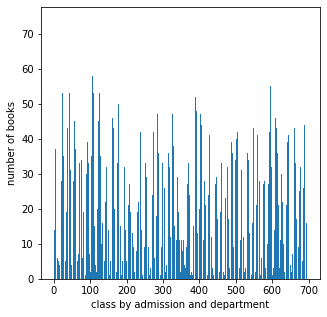

In [36]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.xlabel("class by admission and department")
plt.ylabel("number of books")
plt.bar(x_val,y_val, align = 'center')